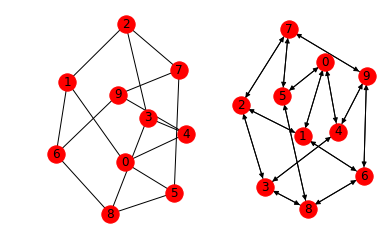

In [2]:
# In this tutorial, you learn how to create a graph and how to read and write node and edge representations
# 1.creating a graph
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()


In [3]:
# The examples below construct the same star graph via different methods.
# DGLGraph nodes are a consecutive range of integers between 0 and number_of_nodes(). 
# DGLGraph edges are in order of their additions. Note that edges are accessed in much the same way as nodes, 
# with one extra feature: edge broadcasting.
import torch
import numpy as np
import scipy.sparse as spp

# Create a star graph from a pair of arrays (using ``numpy.array`` works too).
u = torch.tensor([0, 0, 0, 0, 0])
v = torch.tensor([1, 2, 3, 4, 5])
star1 = dgl.DGLGraph((u, v))

# Create the same graph from a scipy sparse matrix (using ``scipy.sparse.csr_matrix`` works too).
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star3 = dgl.DGLGraph(adj)


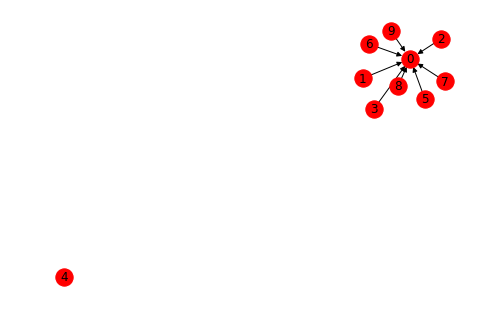

In [9]:
# You can also create a graph by progressively adding more nodes and edges. 
# Although it is not as efficient as the above constructors, it is suitable 
# for applications where the graph cannot be constructed in one shot.
g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = torch.tensor([8, 9]); dst = torch.tensor([0, 0])
g.add_edges(src, dst)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

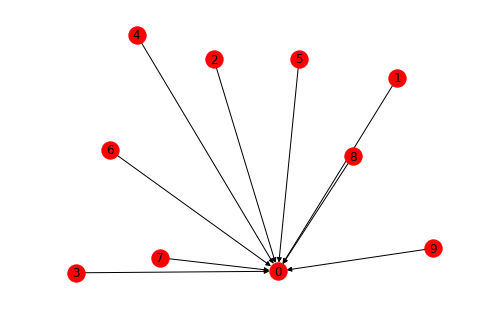

In [8]:
# Edge broadcasting will do star graph in one go!
g = dgl.DGLGraph()
g.add_nodes(10)
src = torch.tensor(list(range(1, 10)))
g.add_edges(src, 0)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [39]:
# 2. assign features to nodes and edges
import torch
import dgl

x = torch.randn(10, 3)
g.ndata['x'] = x

# g.ndata['x'][0] = torch.zeros(1, 3)
# g.ndata['x'][[0, 1, 2]] = torch.zeros(3, 3)

g.ndata['x'][torch.tensor([0, 1, 2])] = torch.randn((3, 3))
g.ndata


{'x': tensor([[-0.3365,  0.6652,  0.1918],
        [-0.7211,  0.0042, -0.9306],
        [-1.2044,  0.0741,  0.5875],
        [ 2.3094, -0.3558,  0.4619],
        [-0.3871, -1.3505, -0.3611],
        [ 0.8394, -1.7994, -0.1570],
        [ 0.8306,  1.2115,  1.0107],
        [ 0.8834, -1.2999,  1.1173],
        [-0.0918,  1.1854, -1.1374],
        [-0.8977, -0.6614, -1.4378]]), 'df': tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), 'y': tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])}

In [40]:
# assigning edge features
print("num edges: {}".format(g.num_edges))
g.edata['w'] = torch.randn(8, 2)

# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = torch.randn(1, 2)
g.edata['w'][[0, 1, 2]] = torch.zeros(3, 2)
g.edata['w'][torch.tensor([0, 1, 2])] = torch.zeros(3, 2)


# You can get the edge ids by giving endpoints, which are useful for accessing the features.
g.edata['w'][g.edge_id(1, 0)] = torch.ones(1, 2)                   # edge 1 -> 0
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = torch.ones(3, 2)  # edges [1, 2, 3] -> 0
# Use edge broadcasting whenever applicable.
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = torch.ones(3, 2)          # edges [1, 2, 3] -> 0

g.edata

num edges: <bound method DGLHeteroGraph.num_edges of Graph(num_nodes=10, num_edges=8,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'df': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(4,), dtype=torch.float32)}
      edata_schemes={'w': Scheme(shape=(2,), dtype=torch.float32)})>


{'w': tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.5590, -0.2901],
        [-0.3963, -0.6706],
        [ 2.3889, -0.5435],
        [-0.1266,  0.6608],
        [ 0.7576, -0.4741]])}

In [41]:
print(g.node_attr_schemes())
g.ndata['x'] = torch.zeros((10, 4))
g.ndata['y'] = torch.ones((10, 4))
print(g.node_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32), 'df': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(4,), dtype=torch.float32)}
{'x': Scheme(shape=(4,), dtype=torch.float32), 'df': Scheme(shape=(4,), dtype=torch.float32), 'y': Scheme(shape=(4,), dtype=torch.float32)}


In [44]:
# working with multi-graphs
g_multi = dgl.DGLGraph()
g_multi.add_nodes(10)
g_multi.ndata['x'] = torch.randn(10, 2)

g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

g_multi.edata['w'] = torch.randn(10, 2)
g_multi.edges[1].data['w'] = torch.zeros(1, 2)
print(g_multi.edges())

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [45]:
g.ndata.pop('x')
g.edata.pop('w')

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.5590, -0.2901],
        [-0.3963, -0.6706],
        [ 2.3889, -0.5435],
        [-0.1266,  0.6608],
        [ 0.7576, -0.4741]])

In [48]:
_, _, eid_10 = g_multi.edge_id(1, 0, return_uv=True)
g_multi.edges[eid_10].data['w'] = torch.ones(len(eid_10), 2)
print(g_multi.edata['w'])

tensor([[ 1.0000,  1.0000],
        [ 0.0000,  0.0000],
        [-0.4455,  0.6498],
        [ 0.2427, -0.3424],
        [-0.6952,  1.7236],
        [ 0.5607, -0.5030],
        [ 1.1083,  0.9903],
        [ 0.2290,  1.6440],
        [-0.3917, -0.7700],
        [ 1.0000,  1.0000]])
